- Co łączy kluby wykonujące najwięcej transferów?
- Czy najczęśniej dokonujące transferów kluby jednorazowo wymieniają dużą część składu, czy dzieje się to co rok?
- Który z klubów pełnił kluczową rolę w przepływie transferów między klubami?
- Kluby mające największy wpływ na wychowanie piłkarzy?
- W których krajach utworzyły się grupy klubów najczęściej wymieniających się piłkarzami?

In [1]:
from contextlib import contextmanager
import pandas as pd
from pathlib import Path
import numpy as np
from tqdm.auto import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

@contextmanager
def unlimited_data_card():
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)

    yield None

    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

In [2]:
FIFA_PLAYERS_DATA = list((Path.cwd() / "fifa_players_data").glob("*"))
TOP_DISPLAY = 20

In [3]:
FIFA_PLAYERS_DATA

[PosixPath('/home/michal/Documents/semestr-1/sieci-zlozone/projekt/fifa_players_data/players_21.csv'),
 PosixPath('/home/michal/Documents/semestr-1/sieci-zlozone/projekt/fifa_players_data/players_17.csv'),
 PosixPath('/home/michal/Documents/semestr-1/sieci-zlozone/projekt/fifa_players_data/players_16.csv'),
 PosixPath('/home/michal/Documents/semestr-1/sieci-zlozone/projekt/fifa_players_data/players_19.csv'),
 PosixPath('/home/michal/Documents/semestr-1/sieci-zlozone/projekt/fifa_players_data/players_18.csv'),
 PosixPath('/home/michal/Documents/semestr-1/sieci-zlozone/projekt/fifa_players_data/players_20.csv'),
 PosixPath('/home/michal/Documents/semestr-1/sieci-zlozone/projekt/fifa_players_data/players_15.csv')]

In [4]:
dataframes = []

for fifa_player_data_path, year in zip(sorted(FIFA_PLAYERS_DATA, key=lambda x: int(str(x).removesuffix(".csv").split("_")[-1])), range(15, 22)):
    df = pd.read_csv(fifa_player_data_path)
    df["year"] = year
    dataframes.append(df)

fifa_data = pd.concat(dataframes)

years = list(range(15,22))
fifa_data

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,year
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,15
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,15
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,...,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,15
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,...,40+3,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,256679,https://sofifa.com/player/256679/kevin-angulo/...,K. Angulo,Kevin Angulo,24,1996-04-13,176,73,Colombia,América de Cali,...,47+2,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2,21
18940,257710,https://sofifa.com/player/257710/mengxuan-zhan...,Zhang Mengxuan,Mengxuan Zhang,21,1999-04-26,177,70,China PR,Chongqing Dangdai Lifan FC SWM Team,...,41+2,41+2,41+2,42+2,45+2,47+2,47+2,47+2,45+2,21
18941,250989,https://sofifa.com/player/250989/zhenghao-wang...,Wang Zhenghao,王政豪,20,2000-06-28,185,74,China PR,Tianjin TEDA FC,...,42+2,42+2,42+2,42+2,44+2,47+2,47+2,47+2,44+2,21
18942,257697,https://sofifa.com/player/257697/zitong-chen/2...,Chen Zitong,Zitong Chen,23,1997-02-20,186,80,China PR,Shijiazhuang Ever Bright F.C.,...,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2,21


In [5]:
fifa_data.shape

len(fifa_data["short_name"].unique())

38843

In [6]:
fifa_data["club_name"].unique().shape

(954,)

In [7]:
import networkx as nx

graphs = {}

for idx, (year_1, year_2) in enumerate(zip(years[:-1], years[1:])):

    year_1_data = fifa_data[fifa_data["year"] == year_1]
    year_2_data = fifa_data[fifa_data["year"] == year_2]

    clubs_2 = year_2_data[["sofifa_id", "club_name"]].set_index("sofifa_id")
    clubs_1 = year_1_data[["sofifa_id", "club_name"]].set_index("sofifa_id")
    
    merged = clubs_2.join(clubs_1, how="inner", lsuffix="_last", rsuffix="_next")

    grouped = merged.reset_index().groupby(["club_name_last", "club_name_next"]).count().rename(columns={"sofifa_id": "count"}).reset_index()
    grouped = grouped[grouped.apply(lambda x: x["club_name_last"] != x["club_name_next"], axis=1)]
    graphs[idx] = nx.from_pandas_edgelist(df=grouped, source="club_name_last", target="club_name_next", edge_attr="count", create_using=nx.DiGraph())


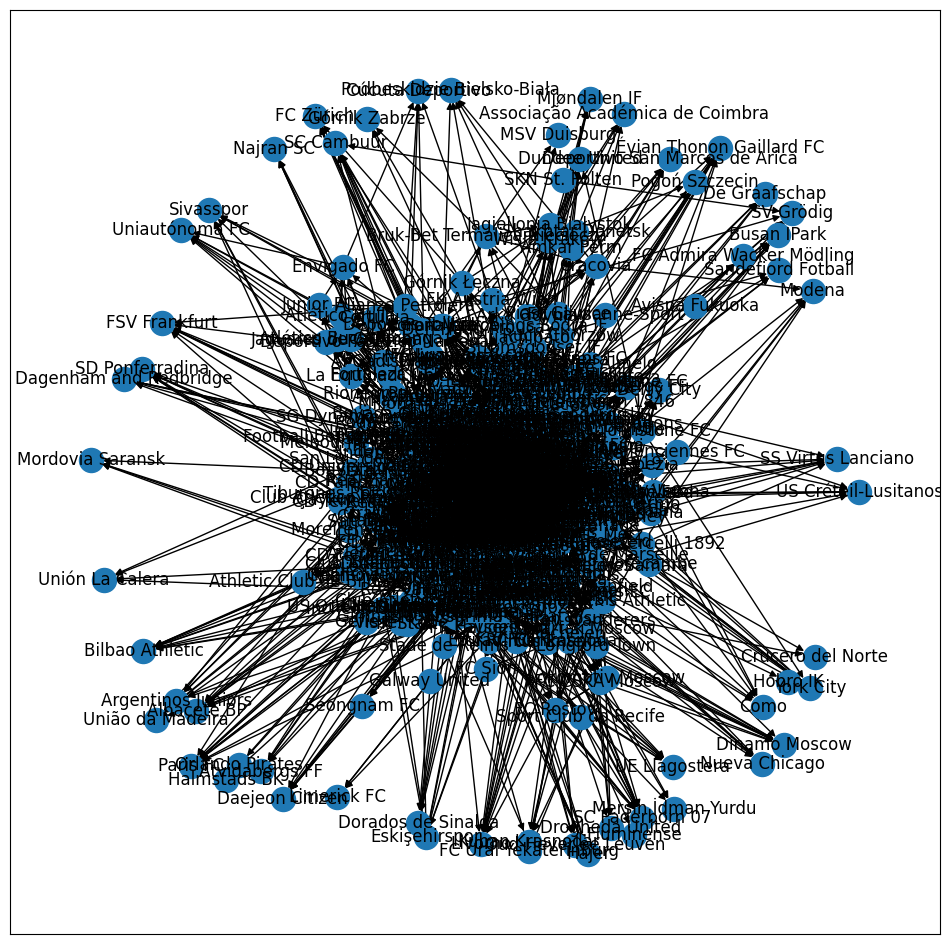

In [8]:
plt.figure(figsize=(12,12))
nx.draw_networkx(graphs[1], with_labels=True)


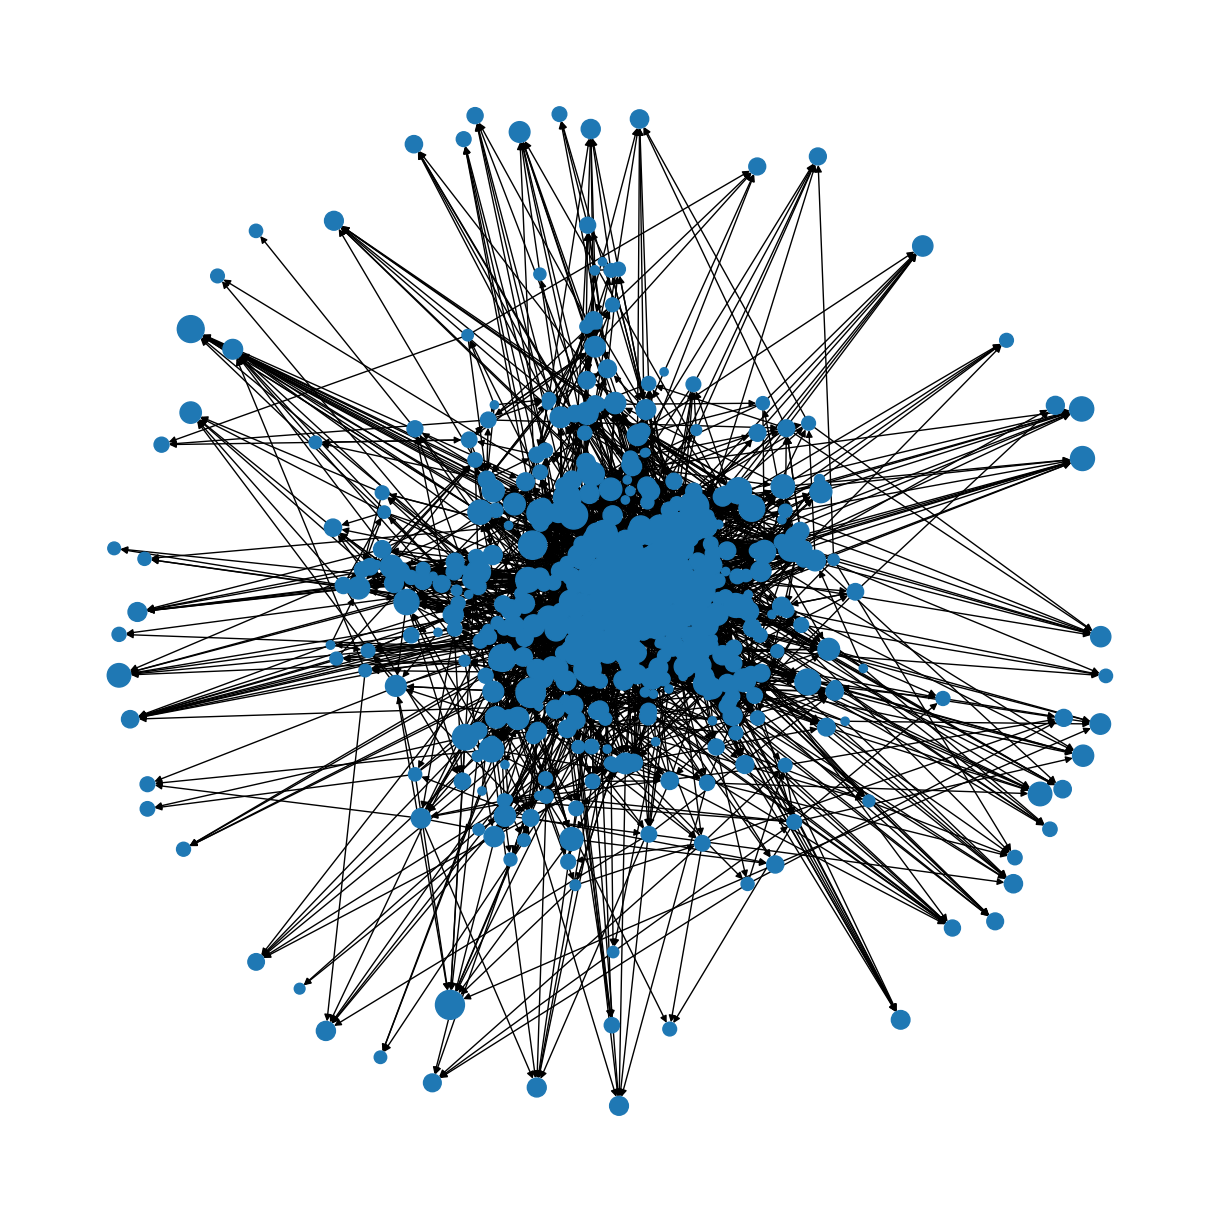

In [9]:
plt.figure(figsize=(12,12))
nx.draw(graphs[0], node_size=[rank * 100000 for rank in nx.pagerank(graphs[0]).values()], with_labels=False)

In [10]:
groups = list(nx.community.k_clique_communities(graphs[0].to_undirected(), k=3))

colors = ['#000000', '#800000', '#008000', '#808000', '#000080', '#800080', '#008080', '#c0c0c0', '#808080', '#ff0000', '#00ff00', '#ffff00', '#0000ff', '#ff00ff', '#00ffff', '#ffffff', '#000000', '#000033', '#000066', '#000099', '#0000cc', '#0000ff', '#003300', '#003333', '#003366', '#003399', '#0033cc', '#0033ff', '#006600', '#006633', '#006666', '#006699', '#0066cc', '#0066ff', '#009900', '#009933', '#009966', '#009999', '#0099cc', '#0099ff', '#00cc00', '#00cc33', '#00cc66', '#00cc99', '#00cccc', '#00ccff', '#00ff00', '#00ff33', '#00ff66', '#00ff99', '#00ffcc', '#00ffff', '#330000', '#330033', '#330066', '#330099', '#3300cc', '#3300ff', '#333300', '#333333', '#333366', '#333399', '#3333cc', '#3333ff', '#336600', '#336633', '#336666', '#336699', '#3366cc', '#3366ff', '#339900', '#339933']

matching = {}
for group, color in zip(groups, colors):
    for club in group:
        matching[club] = color

In [11]:
len(graphs[0].nodes)

635

In [12]:
len(matching)

564

In [13]:
# nx.draw(graphs[0], color=[matching[node] for node in graphs[0].nodes], with_labels=False)

In [14]:
from pyvis.network import Network
import networkx as nx

nt = Network()
nt.from_nx(graphs[0])
nt.show_buttons(filter_=['physics'])
nt.show('nx.html')

Year 15-16
Wigan Athletic --> 33
Elche CF --> 28
Granada CF --> 27
FC Porto --> 25
Genoa --> 25
Aston Villa --> 25
Sampdoria --> 25
Hellas Verona --> 24
Olympique de Marseille --> 24
Queens Park Rangers --> 24
Rotherham United --> 23
Yeovil Town --> 23
Córdoba CF --> 22
Liverpool --> 22
Palermo --> 22
Bursaspor --> 22
Blackpool --> 22
Cambridge United --> 21
Portsmouth --> 21
Fulham --> 21
Year 16-17
Granada CF --> 35
Fulham --> 30
Sampdoria --> 28
Blackburn Rovers --> 27
Reading --> 27
RCD Espanyol --> 27
Sporting CP --> 26
Newcastle United --> 26
Middlesbrough --> 26
Quilmes Atlético Club --> 26
Elche CF --> 25
Oldham Athletic --> 25
Bristol City --> 25
Boca Juniors --> 25
Huddersfield Town --> 25
Real Zaragoza --> 25
Watford --> 25
Peterborough United --> 25
VfB Stuttgart --> 24
West Ham United --> 24
Year 17-18
Granada CF --> 39
Sporting CP --> 29
Middlesbrough --> 29
Barnsley --> 29
VfL Wolfsburg --> 27
Empoli --> 27
Galatasaray SK --> 27
Swansea City --> 27
Fiorentina --> 27
Olym

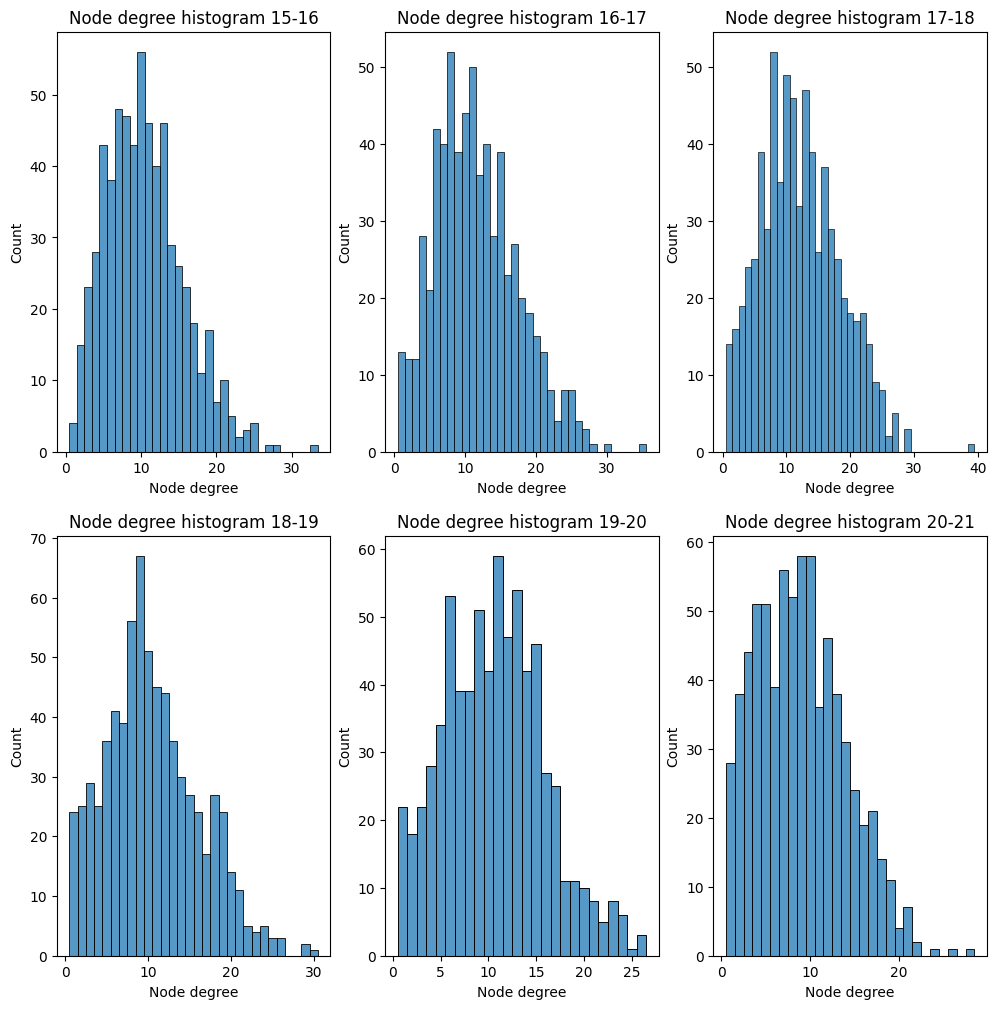

In [15]:
degree_per_year = []

fig, axs = plt.subplots(2, 3, figsize=(12,12))
axs = axs.flatten()

for idx, (graph, year) in enumerate(zip(graphs.values(), range(15, 21))):
    degree = {n: graph.degree(n) for n in graph.nodes()}
    sorted_degree = sorted(degree.items(), key= lambda item: item[1], reverse=True)
    degree_per_year.append(sorted_degree)
    sorted_degree = sorted_degree[:TOP_DISPLAY]
    print(f"Year {year}-{year+1}")
    for club, transfers in sorted_degree:
        print(f"{club} --> {transfers}")
    sns.histplot(degree, discrete=True, ax=axs[idx])
    axs[idx].set_title(f"Node degree histogram {year}-{year+1}")
    axs[idx].set_xlabel("Node degree")
    axs[idx].set_ylabel("Count")
    # plt.show()

In [16]:
team_degree_ranking = []
for year in degree_per_year:
    team_degree_ranking.append([x[0] for x in year])
best_degree_teams = [(x[0], []) for x in team_degree_ranking]

for team, arr in best_degree_teams:
    for ranking in team_degree_ranking:
        arr.append(ranking.index(team)+1)
best_degree_teams
        

[('Wigan Athletic', [1, 26, 19, 52, 3, 14]),
 ('Granada CF', [3, 1, 1, 119, 286, 89]),
 ('Granada CF', [3, 1, 1, 119, 286, 89]),
 ('Peterborough United', [364, 18, 161, 1, 153, 227]),
 ('SD Huesca', [435, 87, 276, 152, 1, 135]),
 ('Genoa', [5, 38, 21, 6, 4, 1])]

#### Co łączy kluby wykonujące najwięcej transferów?
Każdy z klubów nie jest stabilnym uczestnikiem najwyższej ligi rozgrywek w swoim regionie.

#### Czy najczęśniej dokonujące transferów kluby jednorazowo wymieniają dużą część składu, czy dzieje się to co rok?
Kluby dzielą się na dwie kategorie:
- kluby, które po wykonaniu dużej liczby transferów stabilizują swój podstawowy skład
- kluby, które z roku na rok wymieniają dużą liczbę zawodników, pełniące funkcję okresu przejściowego dla zawodników


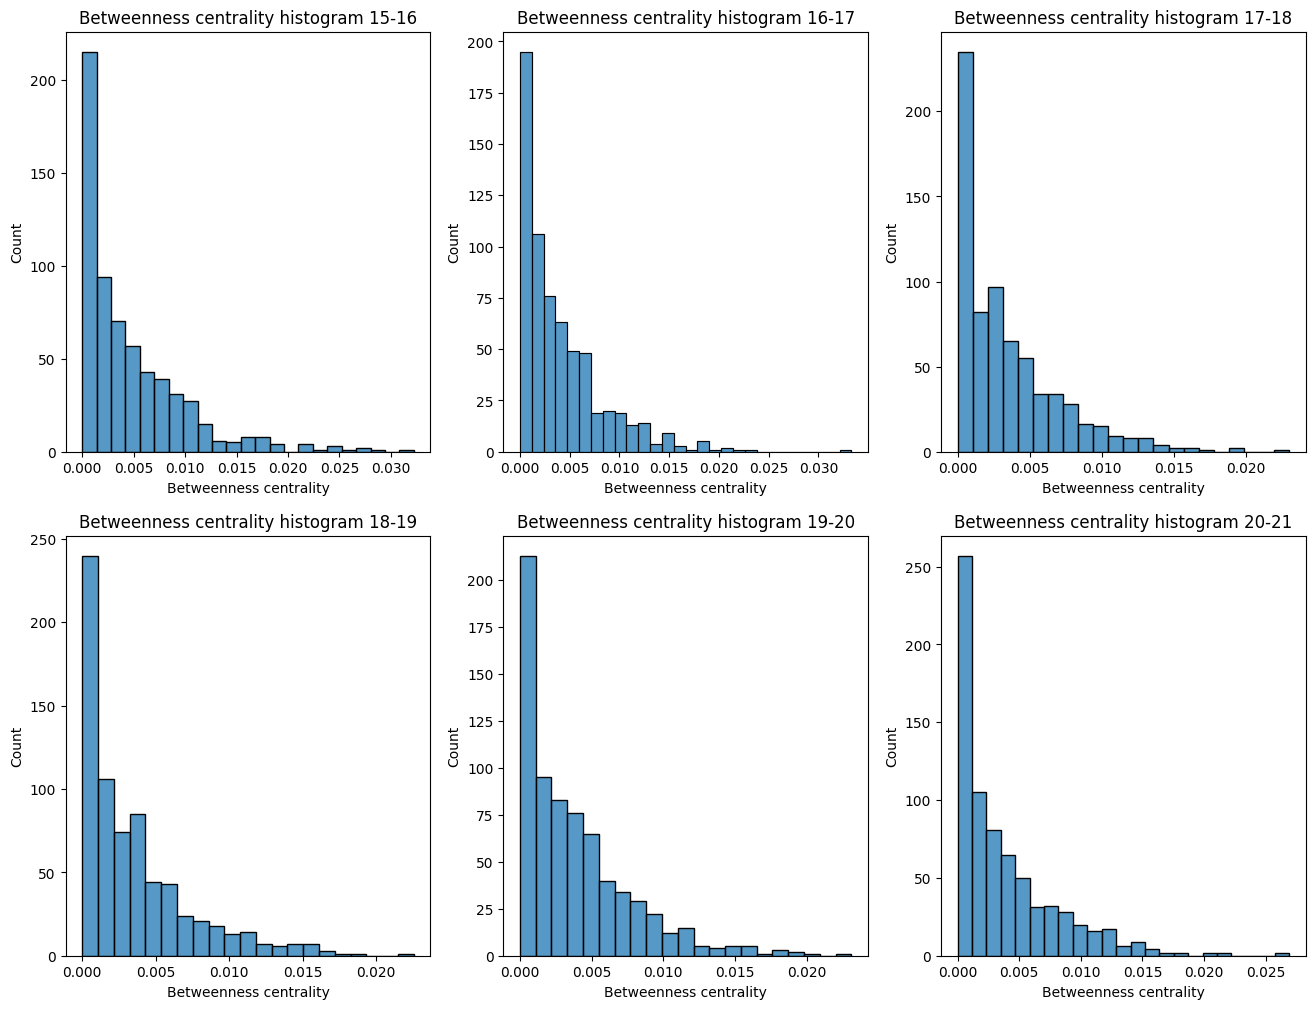

In [17]:
betweenness_per_year = []

fig, axs = plt.subplots(2, 3, figsize=(16,12))
axs = axs.flatten()

for idx, (graph, year) in enumerate(zip(graphs.values(), range(15, 21))):
    betweenness_centrality = nx.betweenness_centrality(graph)
    betweenness_sorted = sorted(betweenness_centrality.items(), key= lambda item: item[1], reverse=True)
    betweenness_per_year.append(betweenness_sorted)
    betweenness_sorted = betweenness_sorted[:TOP_DISPLAY]
    # print(f"Year {year}-{year+1}")
    # for club, transfers in betweenness_sorted:
    #     print(f"{club} --> {round(transfers, 5)}")
    ax = sns.histplot(betweenness_centrality, ax=axs[idx])
    axs[idx].set_title(f"Betweenness centrality histogram {year}-{year+1}")
    axs[idx].set_xlabel("Betweenness centrality")
    axs[idx].set_ylabel("Count")

In [18]:
team_betweenness_ranking = []
for year in betweenness_per_year:
    team_betweenness_ranking.append([x[0] for x in year])
best_betweenness_teams = [(x[0], []) for x in team_betweenness_ranking]

for team, arr in best_betweenness_teams:
    for ranking in team_betweenness_ranking:
        arr.append(ranking.index(team)+1)
best_betweenness_teams

[('Wigan Athletic', [1, 37, 171, 108, 38, 152]),
 ('Boca Juniors', [140, 1, 61, 119, 7, 90]),
 ('Granada CF', [12, 5, 1, 102, 225, 119]),
 ('Deportivo de La Coruña', [65, 68, 255, 1, 59, 573]),
 ('Genoa', [25, 59, 58, 6, 1, 1]),
 ('Genoa', [25, 59, 58, 6, 1, 1])]

#### Który z klubów pełnił kluczową rolę w przepływie transferów między klubami?
Genoa

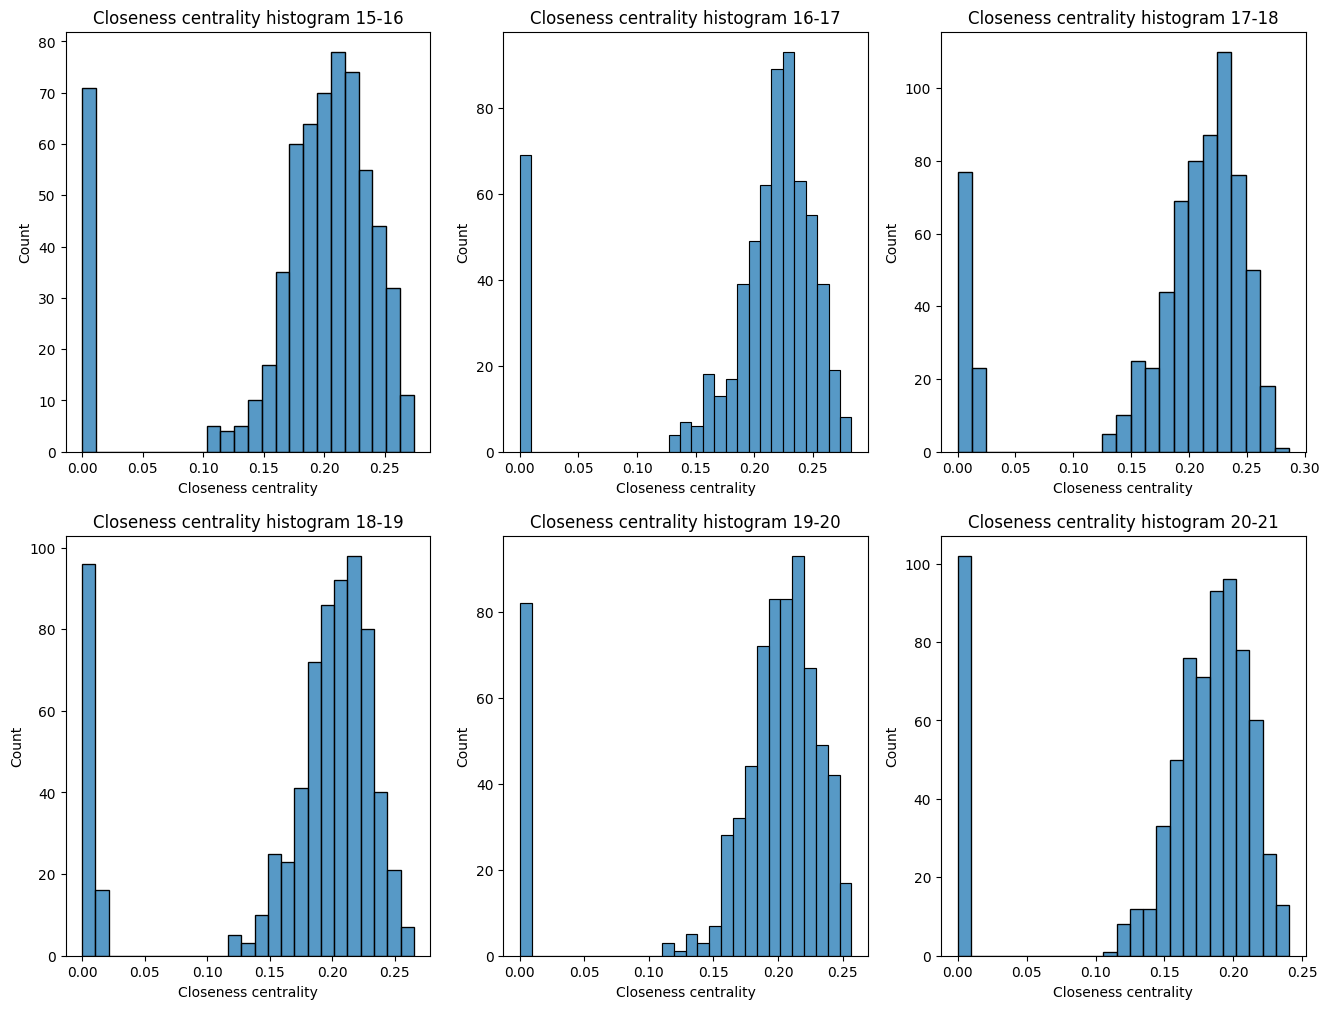

In [19]:
closeness_per_year = []

fig, axs = plt.subplots(2, 3, figsize=(16,12))
axs = axs.flatten()

for idx, (graph, year) in enumerate(zip(graphs.values(), range(15, 21))):
    closeness_centrality = nx.closeness_centrality(graph)
    closeness_sorted = sorted(closeness_centrality.items(), key= lambda item: item[1], reverse=True)
    closeness_per_year.append(closeness_sorted)
    closeness_sorted = closeness_sorted[:TOP_DISPLAY]
    # print(f"Year {year}-{year+1}")
    # for club, transfers in closeness_sorted:
    #     print(f"{club} --> {round(transfers, 5)}")
    sns.histplot(closeness_centrality, ax=axs[idx])
    axs[idx].set_title(f"Closeness centrality histogram {year}-{year+1}")
    axs[idx].set_xlabel("Closeness centrality")
    axs[idx].set_ylabel("Count")

In [20]:
team_closeness_ranking = []
for year in closeness_per_year:
    team_closeness_ranking.append([x[0] for x in year])
best_closeness_teams = [(x[0], []) for x in team_closeness_ranking]

for team, arr in best_closeness_teams:
    for ranking in team_closeness_ranking:
        arr.append(ranking.index(team)+1)
best_closeness_teams

[('Wigan Athletic', [1, 101, 189, 134, 34, 7]),
 ('Sunderland', [126, 1, 25, 23, 43, 246]),
 ('Granada CF', [7, 10, 1, 17, 240, 152]),
 ('Deportivo de La Coruña', [83, 40, 142, 1, 134, 28]),
 ('Genoa', [10, 50, 29, 111, 1, 45]),
 ('RB Leipzig', [135, 145, 120, 68, 182, 1])]

#### Kluby mające największy wpływ na wychowanie piłkarzy?
Granada CF i Genoa

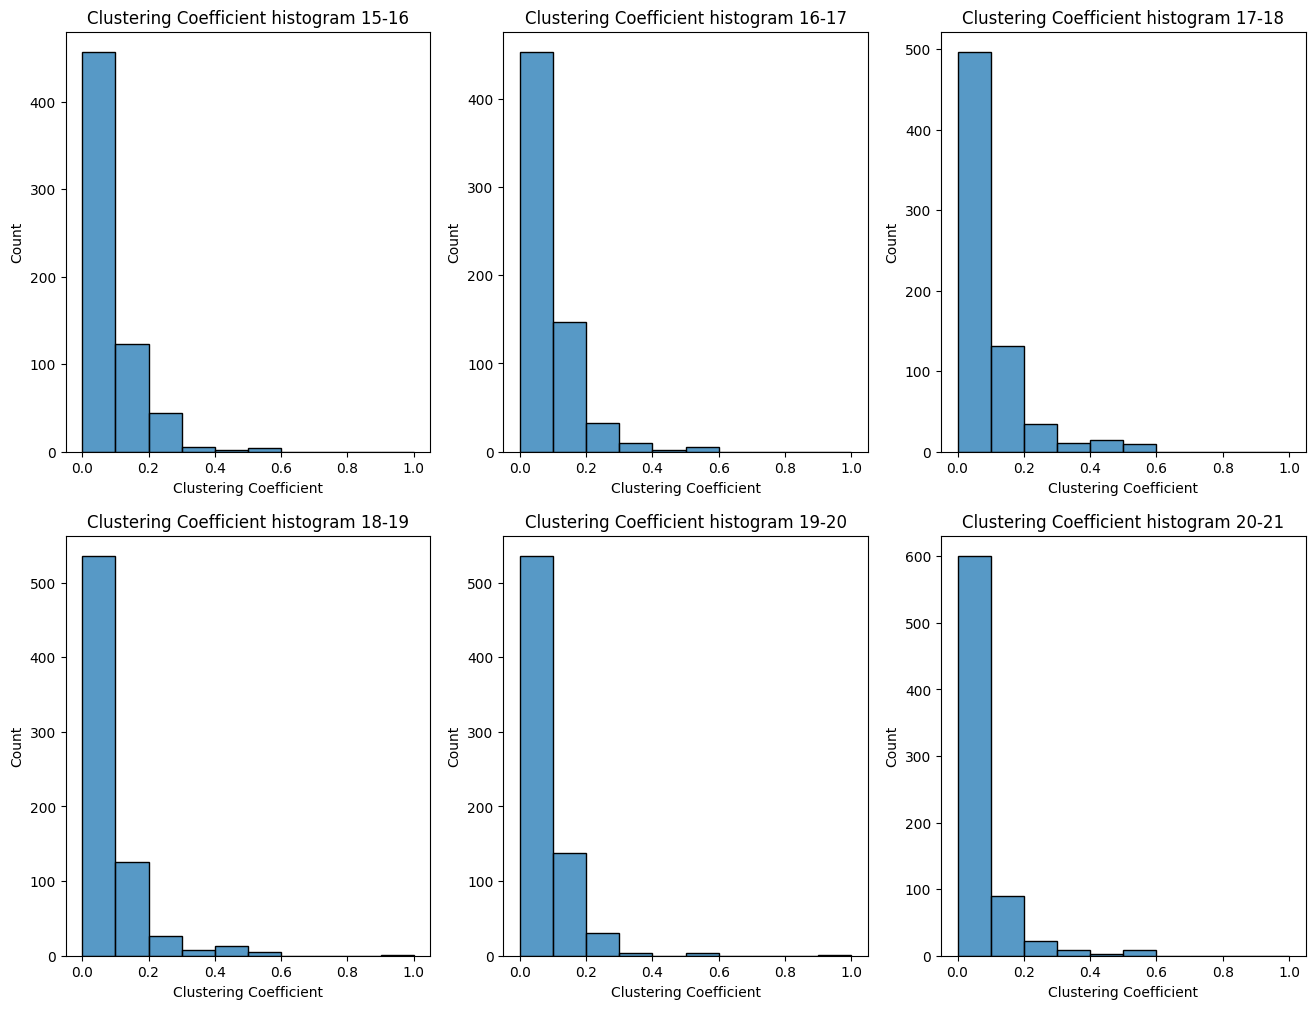

In [21]:
clustering_per_year = []

fig, axs = plt.subplots(2, 3, figsize=(16,12))
axs = axs.flatten()

for idx, (graph, year) in enumerate(zip(graphs.values(), range(15, 21))):
    clustering_coefficient = nx.clustering(graph)
    clustering_sorted = sorted(clustering_coefficient.items(), key= lambda item: item[1], reverse=True)
    clustering_per_year.append(clustering_sorted)
    clustering_sorted = clustering_sorted[:TOP_DISPLAY]
    # print(f"Year {year}-{year+1}")
    # for club, transfers in clustering_sorted:
    #     print(f"{club} --> {round(transfers, 5)}")
    
    bins = np.arange(0, 1.1, step=0.1)
    sns.histplot(list(clustering_coefficient.values()), bins=bins, ax=axs[idx])
    axs[idx].set_title(f"Clustering Coefficient histogram {year}-{year+1}")
    axs[idx].set_xlabel("Clustering Coefficient")
    axs[idx].set_ylabel("Count")

In [22]:
team_clustering_ranking = []
for year in clustering_per_year:
    team_clustering_ranking.append([x[0] for x in year])
best_clustering_teams = [(x[0], []) for x in team_clustering_ranking]

for team, arr in best_clustering_teams:
    for ranking in team_clustering_ranking:
        if team in ranking:
            arr.append(ranking.index(team)+1)
        else:
            arr.append(-1)
best_clustering_teams

[('Al Fateh', [1, 482, 167, 42, 136, 65]),
 ('Adanaspor', [-1, 1, 683, -1, -1, -1]),
 ('Vasco da Gama', [-1, -1, 1, -1, -1, -1]),
 ('Gyeongnam FC', [365, -1, -1, 1, 40, 20]),
 ('Vendsyssel FF', [-1, -1, -1, 714, 1, -1]),
 ('Patriotas Boyacá FC', [11, 56, 102, 54, 90, 1])]

#### W których krajach utworzyły się grupy klubów najczęściej wymieniających się piłkarzami?
- Południowa Korea
- Dania
- Brazylia
- Turcja
- Kolumnia
- Arabia Saudyjska

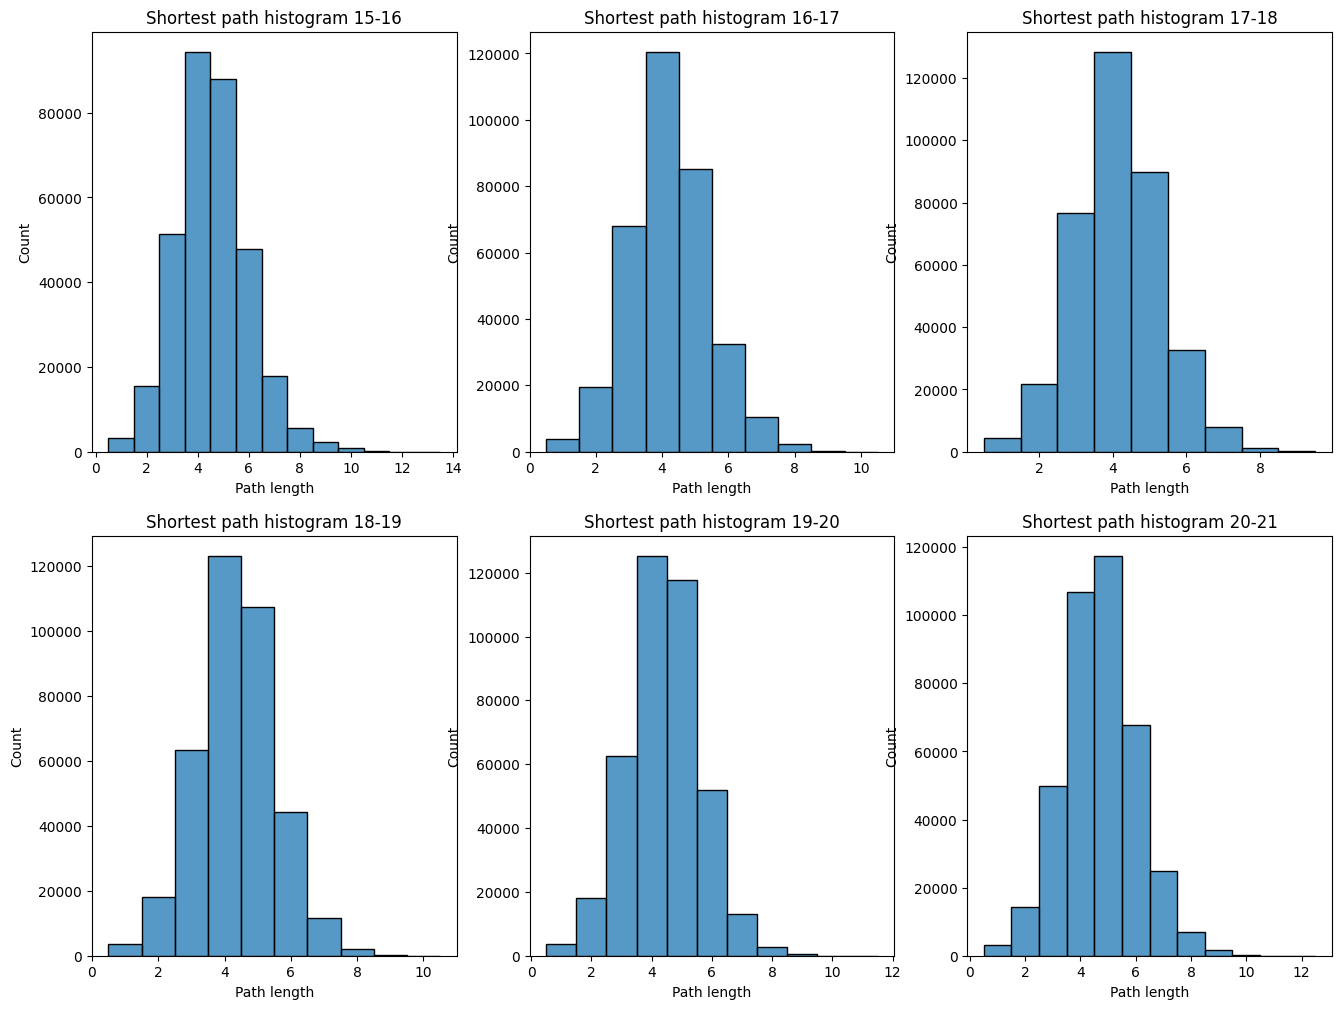

In [23]:
longest_shortest_paths = []

fig, axs = plt.subplots(2, 3, figsize=(16,12))
axs = axs.flatten()

for idx, (graph, year) in enumerate(zip(graphs.values(), range(15, 21))):
    shortest_paths = list(nx.shortest_path_length(graph))
    lengths = []
    for node1, connections in shortest_paths:
        for node2, length in connections.items():
            if node1 == node2:
                continue
        
            lengths.append(length)

    longest_shortest_paths.append(np.max(lengths))

    ax = sns.histplot(lengths, discrete=True, ax=axs[idx])
    axs[idx].set_title(f"Shortest path histogram {year}-{year+1}")
    axs[idx].set_xlabel("Path length")
    axs[idx].set_ylabel("Count")

In [24]:
longest_shortest_paths

[13, 10, 9, 10, 11, 12]

#### Hipoteza sześciu stopni oddalenia w transferowym świecie piłki nożnej
W różnych latach wartość zmienia się, oscylując między 9-13. Jednak znajomości są liczone tylko w roku danego transferu.

In [25]:
import random

all_nodes = set()
all_edges = set()
for graph in graphs.values():
    nodes = set(graph.nodes())
    all_nodes = all_nodes | nodes
    edges = set(graph.edges())
    all_edges = all_edges | edges

full_graph = nx.DiGraph()
full_graph.add_nodes_from(all_nodes)
full_graph.add_edges_from(all_edges)

In [27]:
carrier_path = ['Śląsk Wrocław']
carrier_length = 20

for _ in range(carrier_length):
    reachable_clubs = list(graph.successors(carrier_path[-1]))
    if len(reachable_clubs) == 0:
        carrier_path.append("KONTUZJA!")
        break
    carrier_path.append(random.choice(reachable_clubs))

print(carrier_path)

['Śląsk Wrocław', 'Gazişehir Gaziantep F.K.', 'Medipol Başakşehir FK', 'Hamburger SV', 'FC Hansa Rostock', 'Hallescher FC', '1. FC Union Berlin', 'Fenerbahçe SK', 'Antalyaspor', 'SV Werder Bremen', 'VfL Osnabrück', '1. FC Heidenheim 1846', 'SG Dynamo Dresden', 'Bayern München II', 'SpVgg Greuther Fürth', 'Bayern München II', 'SpVgg Greuther Fürth', 'Bayern München II', 'SpVgg Greuther Fürth', 'FC Twente', 'SG Dynamo Dresden']
